## Importing standard packages:

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in the original data, and joining with the churn and margin predicted values:

In [3]:
combined_df = pd.read_csv('C:\OSU\Sem3\MKTG 5500\combined_data.csv')
churn_df = pd.read_csv('C:\OSU\Sem3\MKTG 5500\churn_scores.csv')
margin_df = pd.read_csv('C:\OSU\Sem3\MKTG 5500\margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

combined_df.shape

(95400, 113)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

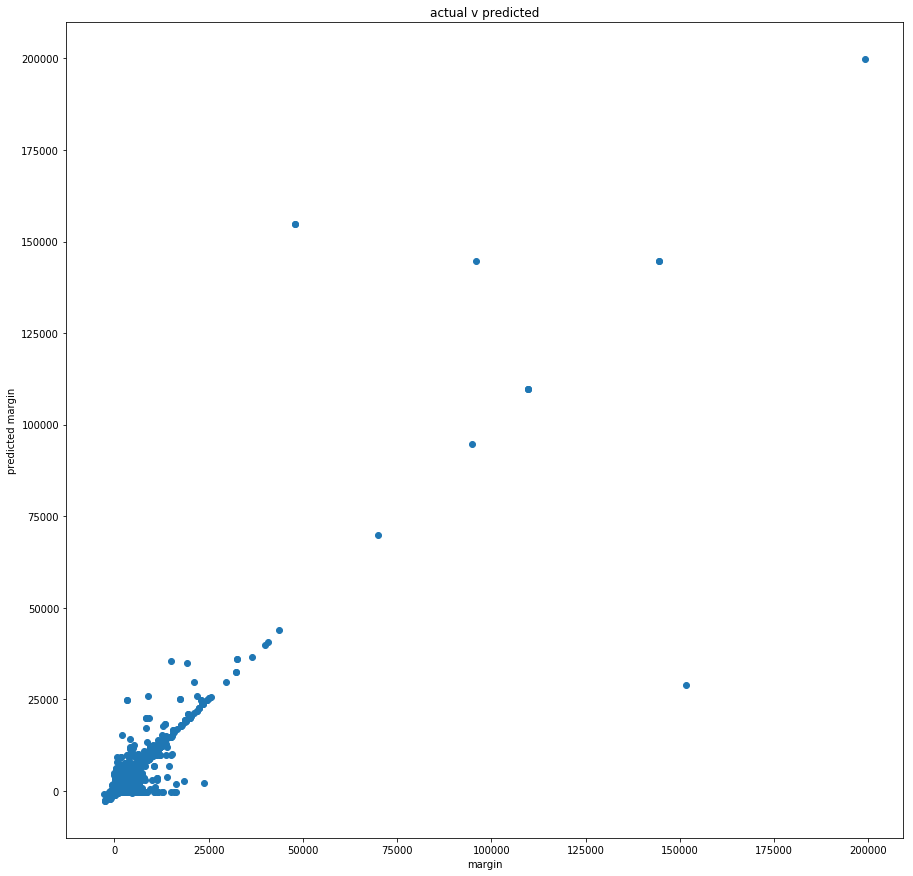

In [4]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000

# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

# It should be noted:  we are scoring our original data, used for modeling, only for the purposes of analysis.
##  In a "real world" situation, we would most likely be scoring a full population for which we did not actually
##  know the future churn or the future margin.

## We are using a simplified CLV formula, in which we:
###    *  are predicting only annual numbers,
###    *  are assuming that next year's annual prediction are the same values for the next 3 years,
###    *  that our future value is adequately estimated using only 3 future years.

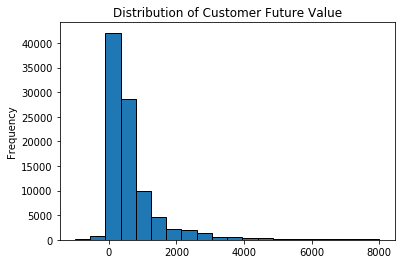

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,...,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,95400.0000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,...,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000,95400.000000
mean,0.5174,0.890996,0.963302,0.091918,0.264277,2.907516,65.357956,4.839812,19.075818,7.725094,...,0.211730,0.064172,0.032820,0.010849,0.005943,0.674486,0.262508,4.702404,411.345698,830.215537
std,0.4997,0.311646,0.188021,0.288912,0.440950,3.098641,58.068499,9.927327,14.804508,44.798662,...,0.408536,0.245060,0.178165,0.103593,0.076864,0.468569,0.317180,0.009231,1626.346197,3404.147834
min,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004467,4.674558,-2732.958639,-6012.151956
25%,0.0000,1.000000,1.000000,0.000000,0.000000,1.000000,14.000000,1.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015881,4.700044,123.844307,78.050362
50%,1.0000,1.000000,1.000000,0.000000,0.000000,1.000000,46.000000,1.210000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.095521,4.700662,195.213044,407.337737
75%,1.0000,1.000000,1.000000,0.000000,1.000000,4.000000,109.000000,2.550000,33.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500229,4.702405,397.092421,801.058447
max,1.0000,1.000000,1.000000,1.000000,1.000000,12.000000,298.000000,165.000000,428.000000,2322.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.954407,5.396389,199108.537213,355761.018233


In [5]:
annual_discount_rate = 0.10
combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

## Establishing the quadrants for high/low churn and margin

In [6]:
print("median predicted churn: ",  np.median(combined_df['P_churn_year_plus1_ind']))
print("median predicted margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"

combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

median predicted churn:  0.0955209388957
median predicted margin: 195


## Output scored data and go to Tableau for more analysis...

In [7]:
combined_df.to_csv('C:\OSU\Sem3\MKTG 5500\CLV_scores.csv',index=False)

In [8]:
combined_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV,retention_grp,margin_grp,quadrant_retention_margin
0,VA,23464,544,missing,0,0,1,0,0,2,...,0,0,1,0.150245,4.758807,7386.177287,13518.689563,1L,2H,1L_2H
1,VA,23464,544,missing,0,0,1,0,0,2,...,0,0,1,0.150245,4.758807,7386.177287,13518.689563,1L,2H,1L_2H
2,NC,27542,560,919,1,1,1,0,0,4,...,0,0,0,0.221885,4.701004,234.731453,366.584202,1L,2H,1L_2H
3,NC,27542,560,919,1,1,1,0,0,4,...,0,0,0,0.221885,4.701004,234.731453,366.584202,1L,2H,1L_2H
4,NV,89109,839,702,0,0,1,0,0,8,...,0,0,1,0.737278,4.703767,555.375317,171.891655,1L,2H,1L_2H
